In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


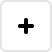
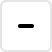
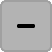
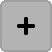
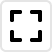
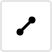
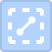
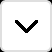
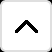
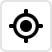
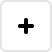
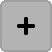
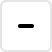
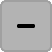
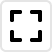
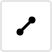
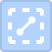
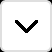
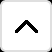
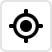

In [2]:
LetsPlot.setup_html()

In [3]:
def get_data(n=10, seed=42):
    np.random.seed(seed)

    x = np.tile(np.arange(1, n + 1), n)
    y = np.repeat(np.arange(1, n + 1), n)
    z = x + y
    angle = np.random.uniform(0, 2 * np.pi, size=n**2)
    radius = np.random.uniform(0, .5, size=n**2)
    group = np.random.choice(['A', 'B'], size=n**2)

    return pd.DataFrame(dict(x=x, y=y, z=z, angle=angle, radius=radius, group=group))

In [4]:
def p(n=10):
    return ggplot(get_data(n), aes('x', 'y')) + geom_point(size=1.5)

In [5]:
p() + geom_spoke(aes(angle='angle'), radius=.5)

In [6]:
p() + geom_spoke(aes(angle='angle', radius='radius', color='radius'))

In [7]:
p() + geom_spoke(aes(angle='angle', radius='radius', color='z'), \
                 show_legend=False, sampling=sampling_random(50), \
                 position=position_nudge(x=.1, y=.1), \
                 tooltips=layer_tooltips(['x', 'y', 'z', 'radius', 'angle']))

In [8]:
def flip_plot(flip):
    return p(3) + geom_spoke(aes(angle='angle'), radius=.5) + coord_fixed(flip=flip)

gggrid([flip_plot(False), flip_plot(True)])

In [9]:
p(3) + geom_spoke(aes(angle='angle'), radius=.5) + facet_wrap(facets='group', ncol=2)

In [10]:
p() + geom_spoke(aes(angle='angle', color='z', linewidth='z'), radius=.5) + \
    scale_color_gradient(low='blue', high='red') + \
    scale_linewidth(range=[.25, 1.5]) + \
    xlim(1.5, 9.5) + ylim(1.5, 9.5)

In [11]:
a30 = np.pi / 6

tests = [
    {
        'title': "Empty data",
        'data': {
            'x': [],
            'y': [],
            'r': [],
            'a': [],
        },
    },
    {
        'title': "One element",
        'data': {
            'x': [0],
            'y': [0],
            'r': [.6],
            'a': [a30],
        },
    },
    {
        'title': "NaN's in data",
        'data': {
            'x': [0, 1, 2, 3, 4, np.nan],
            'y': [0, 0, 0, 0, np.nan, 0],
            'r': [2, 2, 2, np.nan, 2, 2],
            'a': [a30, a30, np.nan, a30, a30, a30],
            'g': ['a', np.nan, 'c', 'd', 'e', 'f'],
        },
    },
    {
        'title': "Big radius",
        'data': {
            'x': [0],
            'y': [0],
            'r': [20],
            'a': [a30],
        },
    },
    {
        'title': "Small radius",
        'data': {
            'x': [0],
            'y': [0],
            'r': [.002],
            'a': [a30],
        },
    },
    {
        'title': "Extend x/y range after flip",
        'data': {
            'x': [0],
            'y': [0],
            'r': [20],
            'a': [a30],
        },
        'flip': True,
    },
]

gggrid([
    ggplot(t['data'], aes('x', 'y', color='g') if 'g' in t['data'].keys() else aes('x', 'y')) + \
        geom_spoke(aes(angle='a', radius='r')) + \
        coord_fixed(flip=t['flip'] if 'flip' in t.keys() else False) + \
        ggtitle(t['title'])
    for t in tests
], ncol=2)